<a href="https://colab.research.google.com/github/AnjaliAnand395/DEEP-LEARNING-PROJECT/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [10]:
# Load the dataset

file_path = '/content/diabetes.xlsx'
data = pd.read_excel(file_path)
data.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
data.shape

(768, 9)

In [11]:
# Replace zero values in key medical columns with NaN to handle them
zero_columns = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
data[zero_columns]=data[zero_columns].replace(0,np.nan)

In [12]:
# Display the number of missing values after replacement for verification
missing_values=data.isna().sum()
missing_values

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [13]:
# Impute missing values using the median of each column
data.fillna(data.median(),inplace=True)

In [14]:
# Separate features(x) and target(y)
x= data.drop("Outcome",axis=1)
y=data["Outcome"]

In [15]:
# Split the data into training and testing sets

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [18]:
# Scale the features to improve model training stability
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [19]:
# Verify the shape of the training and testing sets
x_train_scaled.shape,x_test_scaled.shape,y_train.shape,y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [21]:
# Set a random seed for reproducibility
tf.random.set_seed(42)

In [23]:
# Build the deep learning model
model=Sequential([
    Dense(64,activation="relu",input_shape=(8,)),
    Dropout(0.2),
    Dense(32,activation="relu"),
    Dropout(0.2),
    Dense(16,activation="relu"),
    Dense(1,activation="sigmoid")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
# Compile the model
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [25]:
# Print model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,201 (12.50 KB)

 Trainable params: 3,201 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# Train the model with early stopping to prevent overfitting
history=model.fit(
    x_train_scaled,y_train,
    validation_data=(x_test_scaled,y_test),
    epochs=100,
    batch_size=32,
    callbacks=[EarlyStopping(monitor='val_loss', patience=10,restore_best_weights=True)],
    verbose=1
)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.6103 - loss: 0.6759 - val_accuracy: 0.7143 - val_loss: 0.6010
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7069 - loss: 0.5872 - val_accuracy: 0.7338 - val_loss: 0.5411
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7000 - loss: 0.5437 - val_accuracy: 0.7468 - val_loss: 0.5091
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7570 - loss: 0.4922 - val_accuracy: 0.7273 - val_loss: 0.5023
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7632 - loss: 0.4826 - val_accuracy: 0.7338 - val_loss: 0.5076
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7611 - loss: 0.4948 - val_accuracy: 0.7273 - val_loss: 0.5079
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7714 - loss: 0.4839 - val_accuracy: 0.7338 - val_loss: 0.5050
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7623 - loss: 0.4614 - val_accuracy: 0.7338 - 

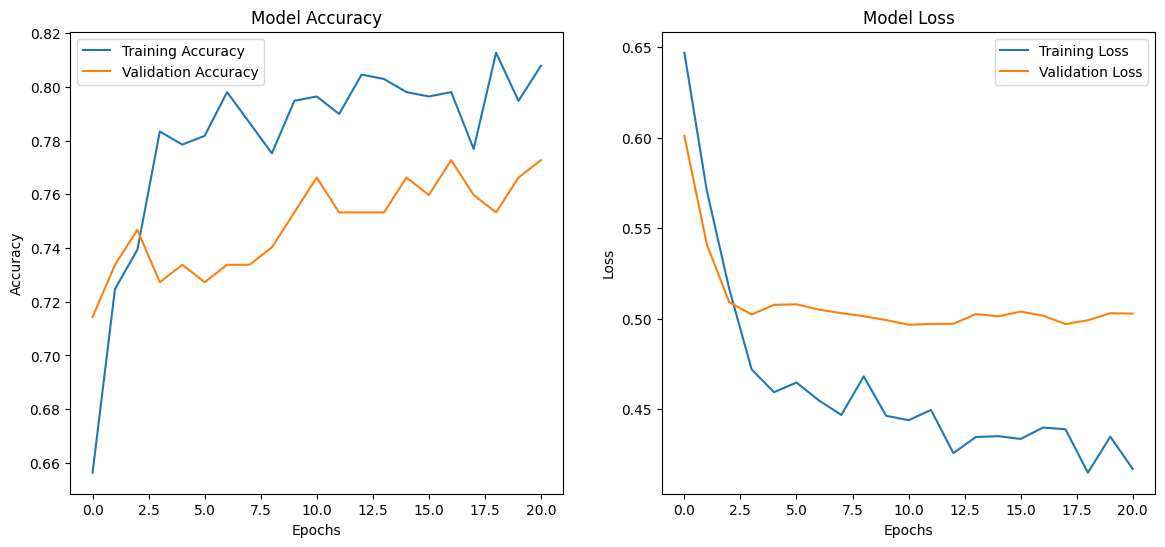

In [27]:
# Plot training history
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"],label="Training Accuracy")
plt.plot(history.history["val_accuracy"],label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["loss"],label="Training Loss")
plt.plot(history.history["val_loss"],label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [28]:
# Evaluate the model on the test set
loss,accuracy=model.evaluate(x_test_scaled,y_test,verbose=0)
print(f"\nTest Accuracy: {accuracy:.4f}")



Test Accuracy: 0.7662


In [32]:
# Generate a classification report
from sklearn.metrics import classification_report
y_pred=(model.predict(x_test_scaled)>0.5).astype(int)
print(classification_report(y_test,y_pred))


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       100
           1       0.66      0.69      0.67        54

    accuracy                           0.77       154
   macro avg       0.74      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



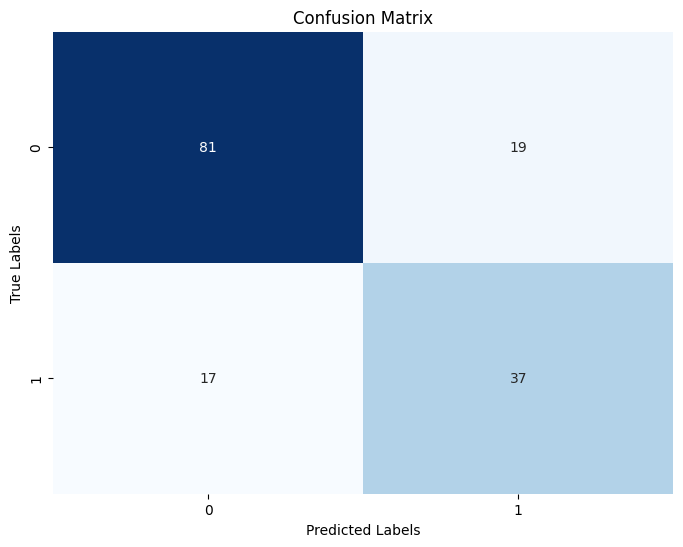

In [33]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt="d",cmap="Blues",cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


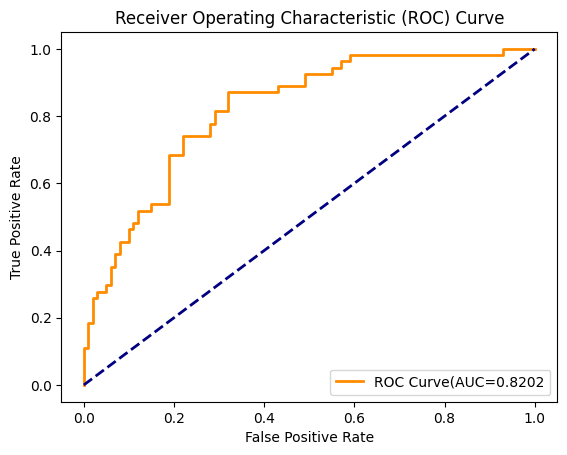

In [34]:
# plot ROC curve
from sklearn.metrics import roc_curve,roc_auc_score
fpr,tpr,thresholds=roc_curve(y_test,model.predict(x_test_scaled))
plt.plot(fpr,tpr,color='darkorange',lw=2,label=f"ROC Curve(AUC={roc_auc_score(y_test,model.predict(x_test_scaled)):.4f}")
plt.plot([0,1],[0,1],color='navy',lw=2,linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()
